In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import constants as const

# remove this line if you installed platypos with pip
sys.path.append('/work2/lketzer/work/gitlab/platypos_group/platypos/')
import platypos
from platypos import Planet_LoFo14
from platypos import Planet_Ot20
# import the classes with fixed step size for completeness
from platypos.planet_LoFo14_PAPER import Planet_LoFo14_PAPER
from platypos.planet_Ot20_PAPER import Planet_Ot20_PAPER
import platypos.planet_models_LoFo14 as plmoLoFo14

# Create Planet object and stellar evolutionary track

## Example planet 1.1 - V1298Tau c with 5 Eearth mass core and measured radius (var. step)

In [13]:
# (David et al. 2019, Chandra observation)
L_bol, mass_star, radius_star = 0.934, 1.101, 1.345 # solar units
age_star = 23. # Myr
Lx_age = Lx_chandra = 1.3e30  # erg/s in energy band: (0.1-2.4 keV)
Lx_age_error = 1.4e29

# use dictionary to store star-parameters
star_V1298Tau = {'star_id': 'V1298Tau', 'mass': mass_star, 'radius': radius_star, 'age': age_star, 'L_bol': L_bol, 'Lx_age': Lx_age}

Lx_1Gyr, Lx_5Gyr = 2.10*10**28, 1.65*10**27
track_low = {"t_start": star_V1298Tau["age"], "t_sat": star_V1298Tau["age"], "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, 
         "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 20., "Lx_drop_factor": 16.}
track_med = {"t_start": star_V1298Tau["age"], "t_sat": star_V1298Tau["age"], "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, 
         "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}
track_high = {"t_start": star_V1298Tau["age"], "t_sat": 240., "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, 
         "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}

# planet c
planet = {"core_mass": 5.0, "radius": 5.59, "distance": 0.0825, "metallicity": "solarZ"}

pl = Planet_LoFo14(star_V1298Tau, planet)
pl.__dict__

{'star_id': 'V1298Tau',
 'mass_star': 1.101,
 'radius_star': 1.345,
 'age': 23.0,
 'Lbol': 3.5753520000000005e+33,
 'Lx_age': 1.3e+30,
 'Lx_sat_info': None,
 'distance': 0.0825,
 'metallicity': 'solarZ',
 'flux': 136.04409090618665,
 'has_evolved': False,
 'planet_id': 'dummy',
 'planet_info': 'Case 2 - obs. planet with radius, but no mass measurement',
 'core_mass': 5.0,
 'radius': 5.59,
 'core_radius': 1.4953487812212205,
 'fenv': 7.42119964332844,
 'mass': 5.4008044830316075}

### Example planet 1.1.1 - V1298Tau c with 5 Eearth mass core and measured radius (fixed step)

In [6]:
pl = Planet_LoFo14_PAPER(star_V1298Tau, planet)

## Example planet 1.2 - V1298Tau c with mass estimate from Otegi et al. (2020) and measured radius (var step)

In [3]:
pl = Planet_Ot20(star_V1298Tau, planet)
pl.__dict__

{'star_id': 'V1298Tau',
 'mass_star': 1.101,
 'radius_star': 1.345,
 'age': 23.0,
 'Lbol': 3.5753520000000005e+33,
 'Lx_age': 1.3e+30,
 'distance': 0.0825,
 'flux': 136.04409090618665,
 'has_evolved': False,
 'planet_id': 'dummy',
 'radius': 5.59,
 'mass': 26.391246598963903,
 'Lx_sat_info': None}

### Example planet 1.2.1 - V1298Tau c with mass estimate from Otegi et al. (2020) and measured radius (fixed step)

In [7]:
pl = Planet_Ot20_PAPER(star_V1298Tau, planet)
pl.__dict__

{'star_id': 'V1298Tau',
 'mass_star': 1.101,
 'radius_star': 1.345,
 'age': 23.0,
 'Lbol': 3.5753520000000005e+33,
 'Lx_age': 1.3e+30,
 'distance': 0.0825,
 'flux': 136.04409090618665,
 'has_evolved': False,
 'planet_id': 'dummy',
 'radius': 5.59,
 'mass': 26.391246598963903,
 'Lx_sat_info': None}

## Example planet 2 - artificial planet with specified core mass and envelope mass fraction

In [12]:
Lx_1Gyr, Lx_5Gyr = 2.10*10**28, 1.65*10**27

dict_star = {'star_id': 'star_age1.0_mass0.89',
 'mass': 0.8879632311581124,
 'radius': None,
 'age': 1.0,
 'L_bol': 1.9992811847525246e+33/const.L_sun.cgs.value,
 'Lx_age': 1.298868513129789e+30}

dict_pl = {'distance': 0.12248611607793611,
 'metallicity': 'solarZ',
'fenv': 3.7544067802231664,
 'core_mass': 4.490153906104026}

track = {"t_start": dict_star["age"], "t_sat": 100., "t_curr": 1000., "t_5Gyr": 5000., "Lx_max": Lx_age, 
         "Lx_curr": Lx_1Gyr, "Lx_5Gyr": Lx_5Gyr, "dt_drop": 0., "Lx_drop_factor": 0.}

pl = Planet_LoFo14(dict_star, dict_pl)
#pl.__dict__

# Evolve & create outputs

In [14]:
%%time

folder_id = "dummy"
path_save = os.getcwd() + "/" + folder_id +"/"
if not os.path.exists(path_save):
    os.makedirs(path_save)
else:
    os.system("rm -r " + path_save[:-1])
    os.makedirs(path_save)

t_final = 5007.
pl.evolve_forward_and_create_full_output(t_final, 0.1, 0.1, "yes", "yes", track_high, path_save, folder_id)

CPU times: user 14.8 s, sys: 11.8 ms, total: 14.8 s
Wall time: 14.8 s


# Read in results and plot

In [15]:
df_pl = pl.read_results(path_save)
df_pl.head()

,Time,Mass,Radius,Lx
0,23.00,5.400804,5.590000,1.300000e+30
1,23.01,5.400013,5.585513,1.300000e+30
2,23.02,5.399224,5.581034,1.300000e+30
3,23.03,5.398437,5.576561,1.300000e+30
4,23.04,5.397653,5.572097,1.300000e+30


In [19]:
df_pl.tail()

,Time,Mass,Radius,Lx
3186,54.86,5.000029,1.509584,1.300000e+30
3187,54.87,5.000020,1.506914,1.300000e+30
3188,54.88,5.000012,1.503741,1.300000e+30
3189,54.89,5.000003,1.499342,1.300000e+30
3190,54.90,5.000000,1.495349,1.300000e+30


In [15]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.plot(df_pl["Time"], df_pl["Lx"])
# ax.loglog()
# plt.show()

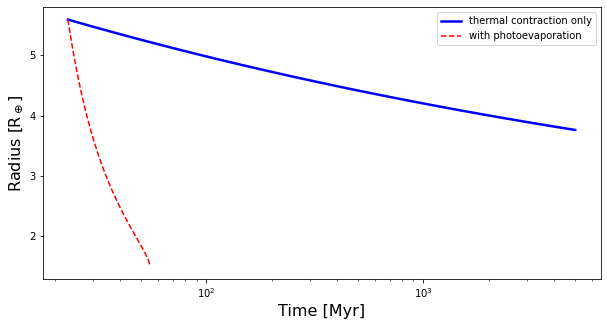

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
age_arr = np.logspace(np.log10(pl.age), np.log10(t_final), 100)

if (type(pl) == platypos.planet_LoFo14.Planet_LoFo14
        or type(pl) == platypos.planet_LoFo14_PAPER.Planet_LoFo14_PAPER):
    ax.plot(age_arr, plmoLoFo14.calculate_planet_radius(pl.core_mass, pl.fenv, age_arr, pl.flux, pl.metallicity), \
            lw=2.5, label='thermal contraction only', color="blue")
    ax.plot(df_pl["Time"], df_pl["Radius"], 
            marker="None", ls="--", label='with photoevaporation', color="red")
else:
    ax.plot(df_pl["Time"], df_pl["Radius"], marker="None", ls="--", label='with photoevaporation', color="red")

ax.legend(fontsize=10)
ax.set_xlabel("Time [Myr]", fontsize=16)
ax.set_ylabel("Radius [R$_\oplus$]", fontsize=16)
ax.set_xscale('log')
#ax.set_ylim(5.15, 5.62)
plt.show()